# GPT Remove Particle Elements
---

In [1]:
from distgen import Generator

from gpt import GPT
from gpt.element import Screen
from gpt.lattice import Lattice
from gpt.remove_particles import CircularAperture

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

## Circular Aperture
This object uses the more general GPT Aperture object, and assume cylindrical symmetry.

In [2]:
CA = CircularAperture('a1', 1e-2, Rmax = 5e-2)
CA.place()

<Axes: xlabel='z (m)', ylabel='x (m)'>

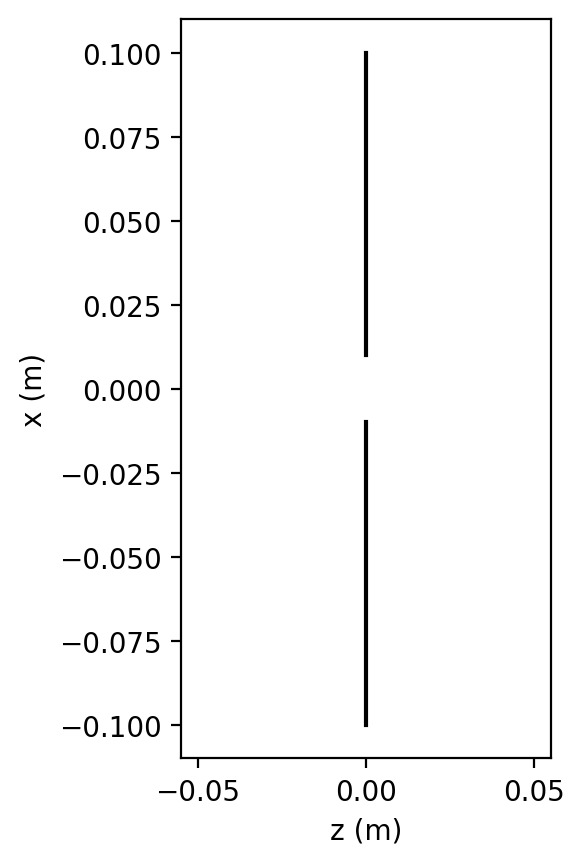

In [3]:
CA.plot_floor()

In [17]:
lat = Lattice('aperture_test')
lat.add(CircularAperture('a1', 1e-2, Rmax = 5e-2), ds=0.1)
lat.add(Screen('scr'), ds=0.25, ref_element='beg')

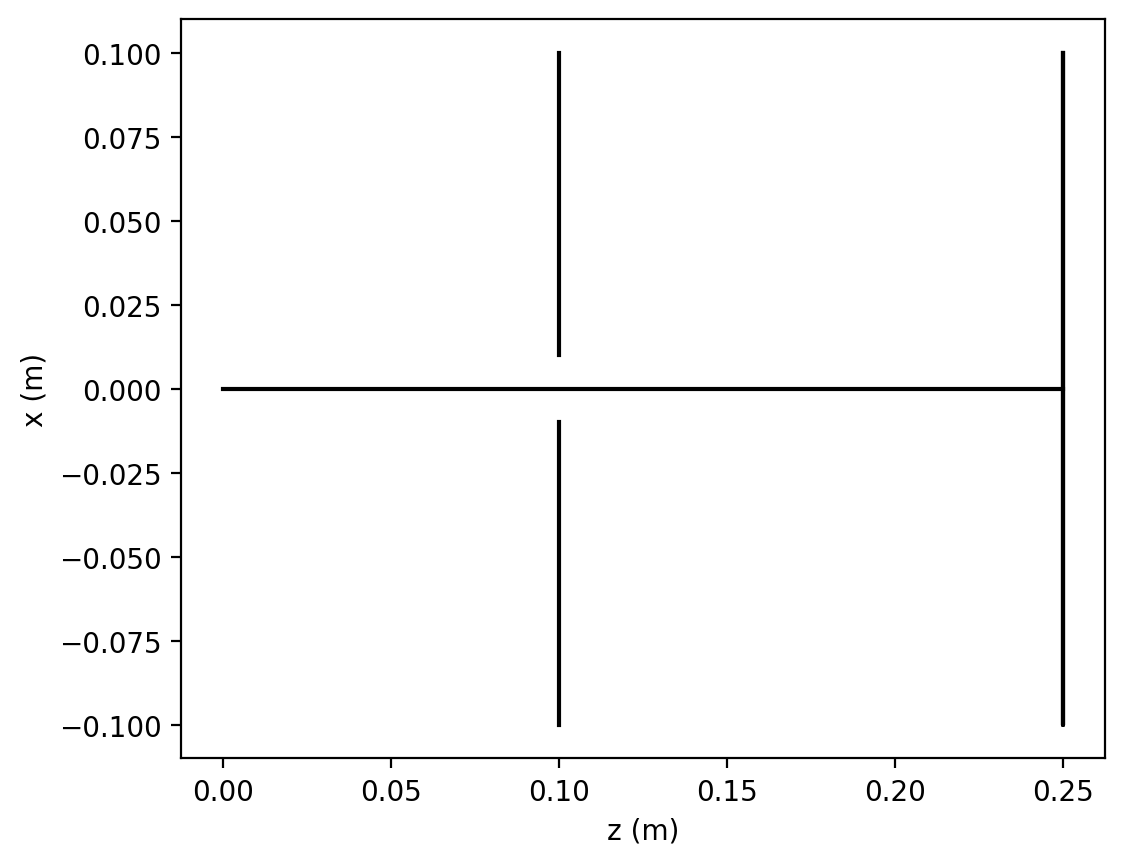

In [6]:
lat.plot_floor();

In [7]:
_=lat.write_gpt_lines(output_file='aperture.in')

In [8]:
distgen_yaml = """
n_particle: 1000
total_charge: 0 C
random:
    type: hammersley
r_dist:
    type: ru
    max_r: 2 cm
start:
    type: time
"""

In [9]:
D = Generator(distgen_yaml)
P = D.run()
P.pz = 1e3

In [10]:
G = GPT('aperture.in', initial_particles=P)
G.set_variables({'ZSTOP':0.25, 'tmax':50e-8, 'Ntout': 200})
G.run()

In [11]:
print(G)


GPT object:
   Original input file: aperture.in
   Template location: /Users/colwyngulliford/GitHub/lume-gpt/examples/elements
   Use temp directory: True

Run Control
   Run configured: True
   Work location: /var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmp5vgd_3wu
   Timeout: None (sec)

Results
   Finished: True
   Error occured: False
   Run time: 0.4452061653137207 (sec)


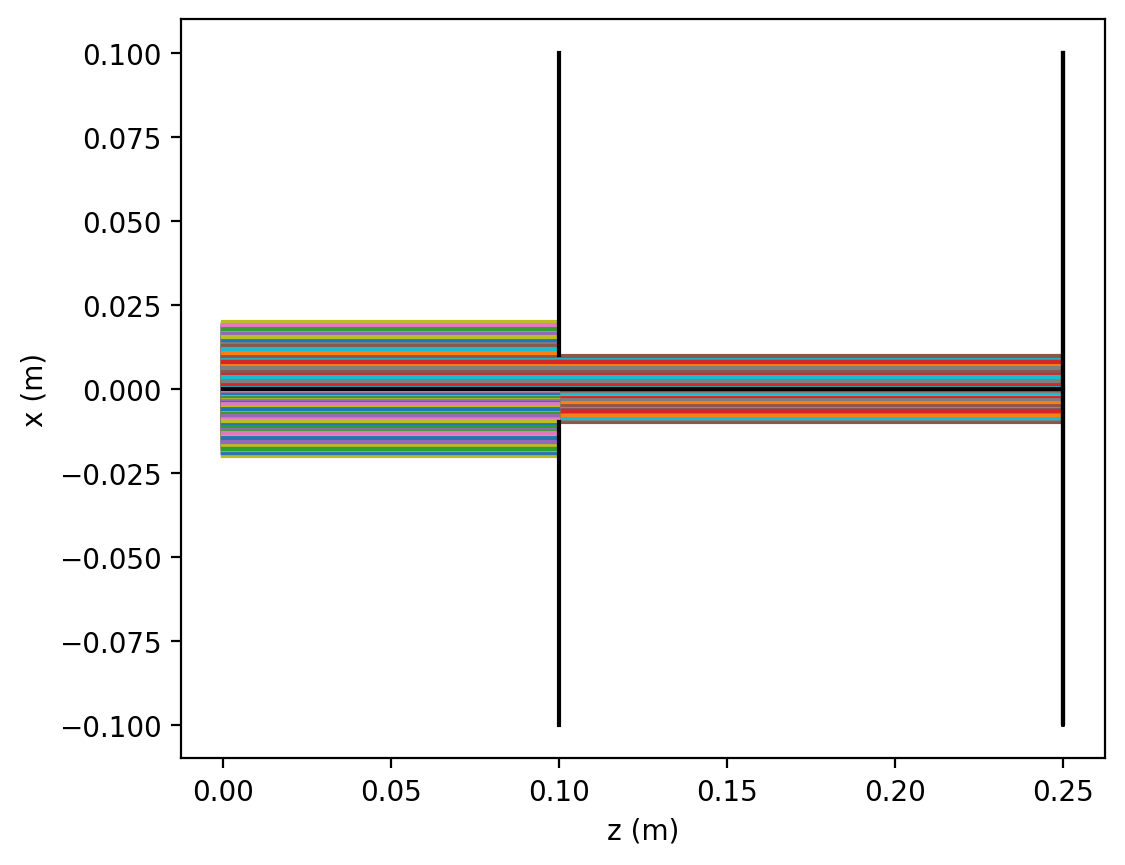

In [12]:
ax = plt.gca()
for ii in range(1, D['n_particle']+1):
    tii = G.trajectory(ii, data_type='tout')
    ax.plot(tii['z'], tii['x'])
ax = lat.plot_floor()

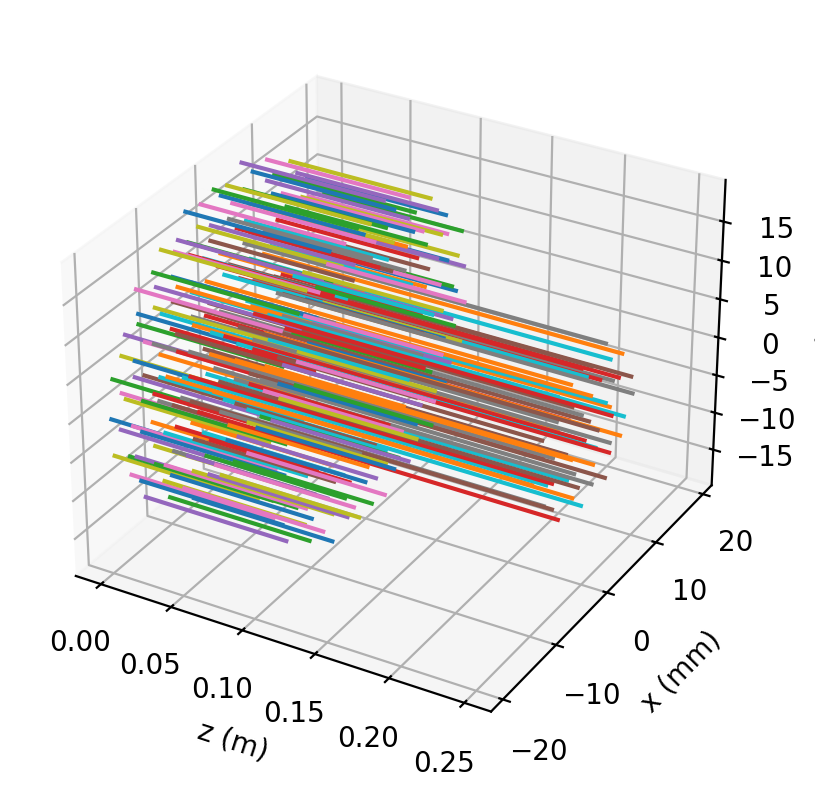

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for ii in range(1, D['n_particle']+1, 5):
    tii = G.trajectory(ii, data_type='tout')
    ax.plot(tii['x']*1000, tii['y']*1000, tii['z'], zdir='x')
    
ax.set_xlabel('z (m)');
ax.set_ylabel('x (mm)');
ax.set_zlabel('y (mm)');

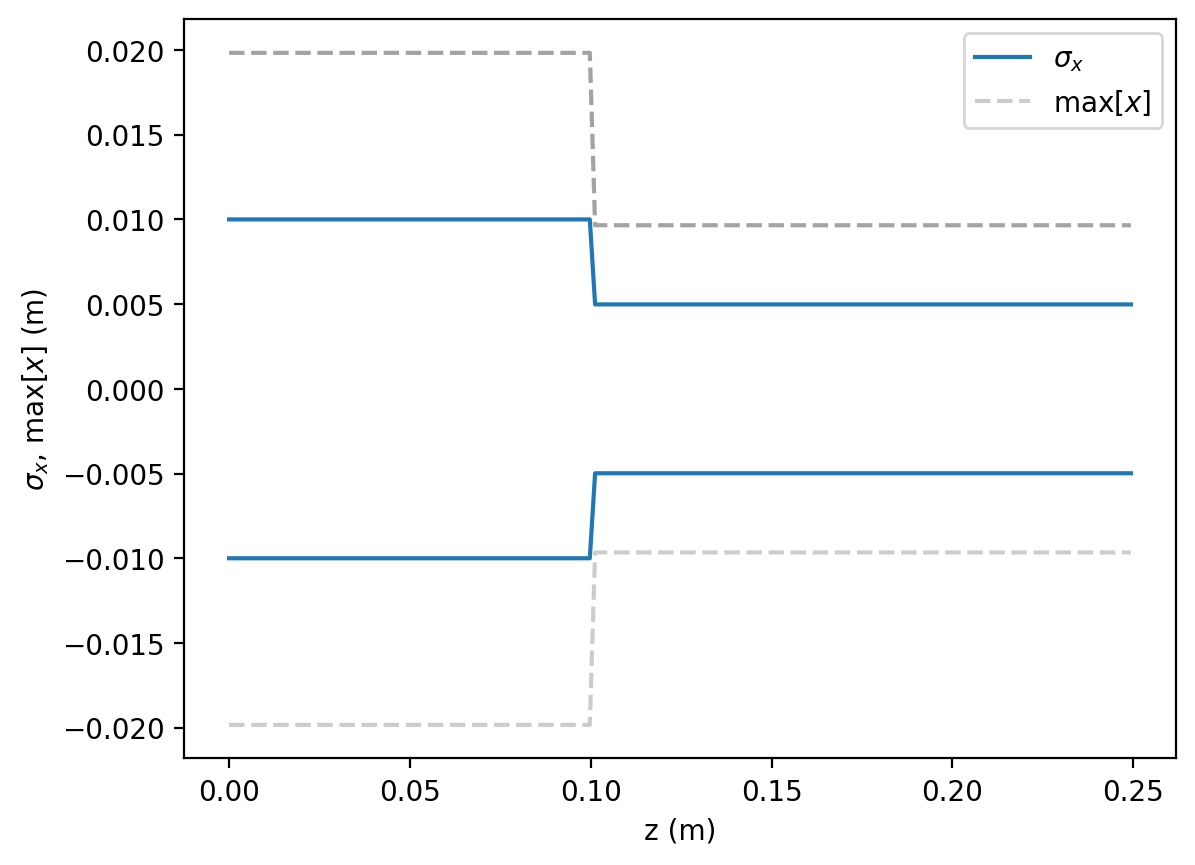

In [14]:
plt.plot(G.tout_stat('mean_z'), +G.tout_stat('sigma_x'))
plt.plot(G.tout_stat('mean_z'), +G.tout_stat('max_x'), '--k', alpha=0.2)
plt.plot(G.tout_stat('mean_z'), -G.tout_stat('sigma_x'), color='tab:blue');

plt.plot(G.tout_stat('mean_z'), +G.tout_stat('max_x'), '--k', alpha=0.2)
plt.plot(G.tout_stat('mean_z'), -G.tout_stat('max_x'), '--k', alpha=0.2);
plt.xlabel('z (m)')
plt.ylabel(r'$\sigma_x$, max[$x$] (m)')
plt.legend([r'$\sigma_x$', r'max[$x$]'])

In [15]:
os.remove('aperture.in')